In [1]:
from dpm.models import PoissonRegression, NegativeBinomialRegression
from functools import partial
import numpy as np
from dpm.visualize import plot_stats
from dpm.distributions import Poisson
import torch

In [65]:
X = torch.rand((10000, 10))
X

tensor([[0.8905, 0.7389, 0.3206,  ..., 0.9059, 0.2895, 0.3502],
        [0.1860, 0.6155, 0.2138,  ..., 0.0303, 0.5373, 0.9733],
        [0.3581, 0.2716, 0.5232,  ..., 0.1999, 0.2385, 0.5629],
        ...,
        [0.6299, 0.6256, 0.5288,  ..., 0.5995, 0.8452, 0.2457],
        [0.3104, 0.7354, 0.6614,  ..., 0.8449, 0.3125, 0.7059],
        [0.5113, 0.5413, 0.5759,  ..., 0.0655, 0.7219, 0.4255]])

In [66]:
Beta = torch.rand(10, 1)
Beta

tensor([[0.2596],
        [0.3666],
        [0.3643],
        [0.5019],
        [0.2100],
        [0.8831],
        [0.7562],
        [0.7703],
        [0.0184],
        [0.3677]])

In [67]:
ret = (X @ Beta)
ret.shape

torch.Size([10000, 1])

In [68]:
y_model = Poisson(ret, learnable=False)
# y.shape

In [69]:
y = y_model.sample(1)

In [70]:
y.shape

torch.Size([1, 10000, 1])

In [71]:
y = y.view(-1, 1)

In [73]:
model = PoissonRegression(input_dim=10)


stats = model.fit(X, y, epochs=2000)




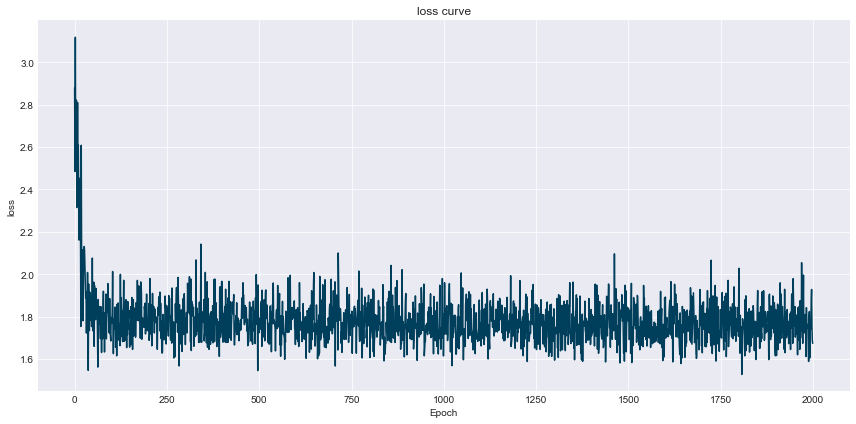

In [74]:
plot_stats(stats)

In [75]:
stats.data

{'loss': [2.879054307937622,
  2.485138416290283,
  3.117800712585449,
  2.5083436965942383,
  2.81533145904541,
  2.8208696842193604,
  2.3144476413726807,
  2.405930995941162,
  2.8104360103607178,
  2.407991886138916,
  2.609272003173828,
  2.3640642166137695,
  2.161118268966675,
  2.452195405960083,
  2.4065630435943604,
  2.2407238483428955,
  2.183185577392578,
  1.753645420074463,
  2.608147621154785,
  2.073868751525879,
  2.0590898990631104,
  2.0066447257995605,
  2.1159493923187256,
  1.7803616523742676,
  2.0008432865142822,
  2.0726611614227295,
  2.130769968032837,
  2.109788417816162,
  2.0384554862976074,
  1.9654505252838135,
  1.886427640914917,
  1.9180556535720825,
  1.722396731376648,
  1.842799425125122,
  1.7987241744995117,
  2.0081048011779785,
  1.8445353507995605,
  1.5462251901626587,
  1.9536683559417725,
  1.7770729064941406,
  1.7340670824050903,
  1.9158003330230713,
  1.7835438251495361,
  1.8140238523483276,
  1.8997231721878052,
  1.8467087745666504,

In [76]:
(model.predict(X) == y).float().mean()

tensor(0.2040)

In [77]:
model.predict(X)

tensor([[2.],
        [1.],
        [4.],
        ...,
        [3.],
        [1.],
        [2.]], grad_fn=<SqueezeBackward1>)

In [78]:
[p for p in model.parameters()]

[Parameter containing:
 tensor([[ 0.4007,  0.3875,  0.2367,  0.5273,  0.1980,  0.8346,  0.8184,  0.8613,
          -0.1581,  0.4229]], requires_grad=True), Parameter containing:
 tensor([-0.1505], requires_grad=True)]

In [79]:
Beta

tensor([[0.2596],
        [0.3666],
        [0.3643],
        [0.5019],
        [0.2100],
        [0.8831],
        [0.7562],
        [0.7703],
        [0.0184],
        [0.3677]])

In [80]:
ret

tensor([[3.0404],
        [1.8476],
        [1.8456],
        ...,
        [2.5605],
        [2.4703],
        [2.0258]])

In [81]:
t = model.model._create_dist(X)

In [82]:
t

Poisson()

In [83]:
y_model.kl(t).sum()

tensor(17.6424, grad_fn=<SumBackward0>)

In [97]:
nb_model = NegativeBinomialRegression(input_dim=10)
stats=None

In [98]:
stats = nb_model.fit(X, y, epochs=2000, stats=stats)

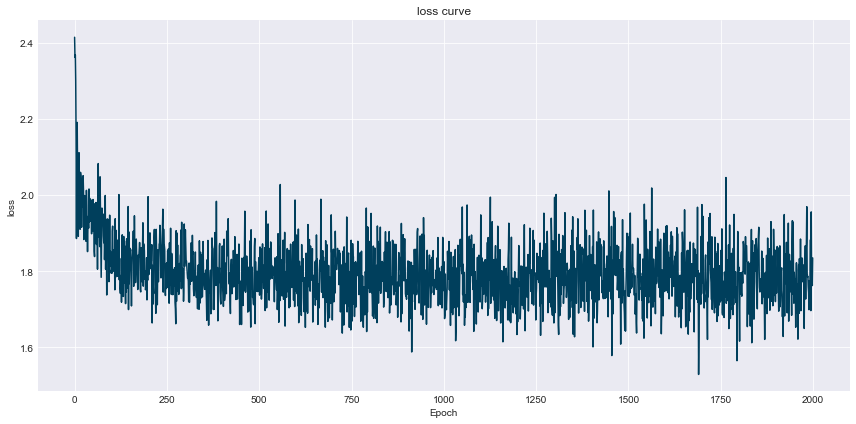

In [99]:
plot_stats(stats)

In [100]:
model.predict(X)

tensor([[3.],
        [1.],
        [2.],
        ...,
        [3.],
        [0.],
        [3.]], grad_fn=<SqueezeBackward1>)

In [101]:
y

tensor([[0.],
        [1.],
        [6.],
        ...,
        [3.],
        [2.],
        [3.]])

In [102]:
t_c, p = nb_model(X)

In [103]:
(y - nb_model.predict(X)).pow(2).sum()

tensor(49941.)

In [104]:
-t.log_prob(y).mean()

tensor(1.7649, grad_fn=<NegBackward>)

In [105]:
-t.log_prob(nb_model.predict(X)).mean()

tensor(1.8411, grad_fn=<NegBackward>)